# Spam Email Classification using Supervised Learning, followed by Feature Engineering

## 1. Uploading Kaggle API Key

In [1]:
# I upload my Kaggle API Key
from google.colab import files

# Prompt user to upload Kaggle API key (kaggle.json)
files.upload()

# Proper API Key storage should be in a private location where others cannot view it.
!mv "kaggle.json" /root/.kaggle/kaggle.json

# Making the API Key private
!chmod 600 /root/.kaggle/kaggle.json

{}

## 2. Data Collection

In [ ]:
# Download the dataset directly from Kaggle, using the API key
!kaggle datasets download -d balaka18/email-spam-classification-dataset-csv

email-spam-classification-dataset-csv.zip: Skipping, found more recently modified local copy (use --force to force download)


Loading the dataset using pandas:

In [ ]:
# I import Pandas, which then reads the csv file
import pandas as pd

database = pd.read_csv ('/content/email-spam-classification-dataset-csv.zip')

## 3. Data Cleaning



Performing initial exploration of the dataset structure and integrity:

In [ ]:
# head() shows the first few rows of data
print ("Data head:\n", database.head(), "\n")

# shape shows how many rows and columns the database has
print ("Data shape:\n", database.shape, "\n")

# dtypes goes through each column in the database and finds out what each type of data the columns hold
print ("Data dtypes:\n", database.dtypes, "\n")

# describe() gives us more basic statistics about the database
print ("Data describe:\n", database.describe(), "\n")

Data head:
   Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns] 

Data shape:
 (5172, 3002) 

Data dtypes:
 Email 

Checking for and removing missing values:

In [ ]:
# Storing the missing values from the database.
# The missing values are the columns where there is no data
missing_values = database.isnull().sum()

# Printing the missing values
print ("Values that are missing:\n", missing_values)

# Removing the missing values from the database
cleansed_data = database.dropna()

Values that are missing:
 Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


Checking for and removing duplicate entries:

In [ ]:
# Placing all the duplicate rows in the database into a variable
duplicate_rows = database [database.duplicated()]

# Printing the rows to see if there are any
print ("Duplicate Rows:\n", duplicate_rows)

# Removing the rows
removed_data = database.drop_duplicates()

Duplicate Rows:
 Empty DataFrame
Columns: [Email No., the, to, ect, and, for, of, a, you, hou, in, on, is, this, enron, i, be, that, will, have, with, your, at, we, s, are, it, by, com, as, from, gas, or, not, me, deal, if, meter, hpl, please, re, e, any, our, corp, can, d, all, has, was, know, need, an, forwarded, new, t, may, up, j, mmbtu, should, do, am, get, out, see, no, there, price, daren, but, been, company, l, these, let, so, would, m, into, xls, farmer, attached, us, information, they, message, day, time, my, one, what, only, http, th, volume, mail, contract, which, month, ...]
Index: []

[0 rows x 3002 columns]


There do not seem to be any duplicated rows.

## 4.  Exploration Data Analysis (EDA)

Visualizing the distribution of the target variable:

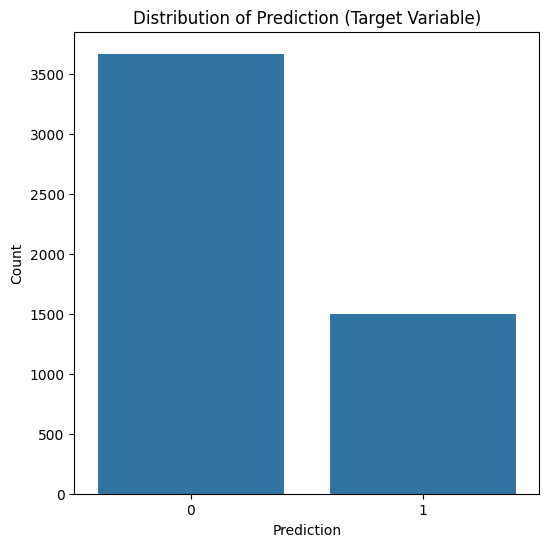

In [ ]:
# I import both matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# I want the figure to be 6 x 6
plt.figure (figsize = (6, 6))

# I am counting from the database column "Prediction"
sns.countplot (x = database ["Prediction"])

# The title of the figure
plt.title ("Distribution of Prediction (Target Variable)")

# The X axis is named Prediction
plt.xlabel ("Prediction")

# The Y axis is named Count
plt.ylabel ("Count")

# Finally, I show the figure
plt.show()

## 5. Feature Engineering

In the next code snippets I am preparing the data by dropping the "Email No." and "Prediction" columns, with the target variable being the "Prediction" column. The model learns that the Y predicted spam emails have "z" features from X, and from the correlation can predict spam emails.

In [ ]:
# I use "X" as features to make predictions based on the database.
# I tell the database to drop two columns; "Email No." and "Prediction".
# The features of the database will therefore be all columns except for the specified two.
# I cannot predict the target variable, so "Prediction" also gets cut.
X = database.drop (columns = ["Email No.", "Prediction"])

# I use "Y" as the Target Variable, which is what we want to predict.
# Prediction is our target variable, based on the X features.
# Here, the Target Variable is if an email is spam or not.
y = database ["Prediction"]

I thereafter split the dataset into training and testing, where 20% goes into testing after training.

In [ ]:
# I import a function that will split the database into training and testing
from sklearn.model_selection import train_test_split

# The data gets divided into training & testing. Like defined above, X are features and y is the target variable.
# Using the train and test functions, the model learns the relationship between the features and the target
# test_size tells the database how much of the data is to be used for training (80%) vs. testing (20%)
# The random state is a random number that ensures that the data gets split the same way whenever the code is run, keeping it producing consistent results.
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42 )

## 6. Model Training

Using Multinominal Naive Bayes, the model gets trained:

In [ ]:
# I import the Multinomial Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB

# I initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# I train the classifier using the training data specified above
nb_classifier.fit (X_train, y_train)

MultinomialNB()

## 7. Evaluation & Metrics


Evaluating the model performance using accuracy, precision, recall, F1 score, and a confusion matrix:

In [ ]:
# I import the metrics I need to evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# I predict the Target Variable for the testing set
y_prediction = nb_classifier.predict (X_test)

# These are the evaluation metrics I chose, and now calculate them based on the testing and prediction
accuracy = accuracy_score (y_test, y_prediction)
precision = precision_score (y_test, y_prediction)
recall = recall_score (y_test, y_prediction)
score = f1_score (y_test, y_prediction)

# I print the results of the evaluation metrics
print ("Accuracy:", accuracy)
print ("Precision:", precision)
print ("Recall:", recall)
print ("F1 Score:", score)

# The confusion matrix describes the correct and incorrect predictions
# y_test is the values of the test set
# y_predictions are the predicted model values for the same data

# The confusion matrix calculates:
#   - number of true positives
#   - number of false positives
#   - number of true negatives
#   - number of false negatives
conf_matrix = confusion_matrix (y_test, y_prediction)
print ("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.9545893719806763
Precision: 0.890282131661442
Recall: 0.9594594594594594
F1 Score: 0.9235772357723576

Confusion Matrix:
 [[704  35]
 [ 12 284]]


The results of the metrics show that the model can filter out spam vs. legitimate emails, with an accuracy (number of correct email classifications) of 95.46%, with a precision (percentage of correct spam emails) of 89.03%, a recall (emails counted as spam that were actually spam) of 95.95%, and the F1 Score (a formula that combines the precision and recall with a focus on lower values, meant to indicate if the performance is good or not) of 92.36%, which is closer to 1 and 0 and considered a good overall performance, because it indicates that the model has a good balance of minimizing false positives, and false negatives.

<br>

For the Confusion Matrix:
- The top left number (704) is the True Negatives, which are the number of correctly predicted legitimate emails.

- The top right number (35) is the False Positives, which is the number of legitimate emails incorrectly classified as spam.

- The bottom left number (12) is the False Negatives, which is the number of spam emails incorrectly classified as legitimate emails.

- The bottom right number (284) is the True Positives, which is the number of correctly classified spam emails.

## 8. Visualization

Visualizing the confusion matrix with a heatmap:

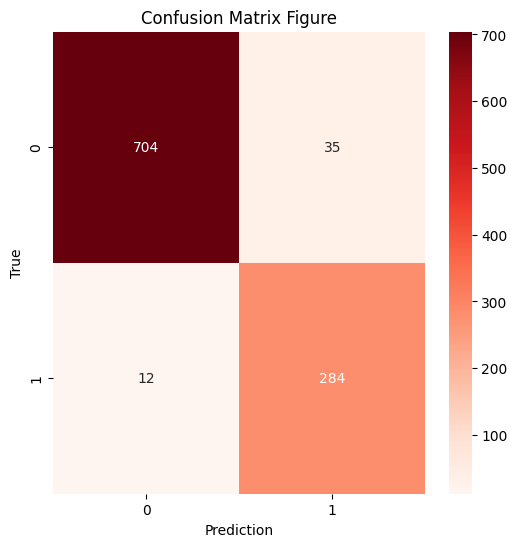

In [ ]:
# The size of the figure
plt.figure (figsize = (6, 6))

# I create a heatmap figure using the Seaborn library that visualizes the confusion matrix
# annot = True lets the counts be displayed, using fmt = "d" the format becomes decimals
# I change the color of the figure using cmap = "Reds"
sns.heatmap (conf_matrix, annot = True, fmt = "d", cmap = "Reds")

# I set the title of the figure
plt.title ("Confusion Matrix Figure")

# X axis name
plt.xlabel ("Prediction")

# Y axis name
plt.ylabel ("True")

plt.show()